In [4]:
def get_model_statistic(connection, model_id):
    cursor = connection.cursor()
    get_query = '''SELECT * FROM statistics WHERE model_id = {}'''.format(
        model_id)
    cursor.execute(get_query)
    statistic = cursor.fetchall()

    return statistic

In [28]:
def get_model_definition(connection, model_id):
    cursor = connection.cursor()
    get_query = '''SELECT * FROM definitions WHERE model_id = {}'''.format(
        model_id)
    cursor.execute(get_query)
    definitions = cursor.fetchall()

    return definitions

In [19]:
import pandas as pd
import sqlite3
# from database.queries import get_model_statistic


def build_stat_df(model_id):
    db_path = '../database/drone_definitions.db'
    connection = sqlite3.connect(db_path)
    stat = get_model_statistic(connection, model_id)
    df = pd.DataFrame(stat, columns=[
                      'id', 'definition_id', 'model_id', 'unique_word', 'words', 'sentence', 'paragraph'])
    
    return df


In [31]:
def build_def_df(model_id):
    db_path = '../database/drone_definitions.db'
    connection = sqlite3.connect(db_path)
    definition = get_model_definition(connection, model_id)
    df = pd.DataFrame(definition, columns=[
                      'id', 'definition', 'term_id', 'term', 'model_id', 'model_name', 'prompt_id', 'prompt', 'counter', 'cosine_distance', 'euclidean_distance', 'manhattan_distance', 'sum_distance'])
    
    return df

In [20]:
df = build_stat_df(1)

In [21]:
df.describe()

,id,definition_id,model_id,unique_word,words,sentence,paragraph
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.0
mean,124.500000,128.362903,1.0,33.657258,45.153226,3.262097,1.0
std,71.735626,71.966798,0.0,11.734904,18.478369,0.913160,0.0
min,1.000000,1.000000,1.0,10.000000,13.000000,2.000000,1.0
25%,62.750000,66.750000,1.0,25.750000,32.000000,3.000000,1.0
50%,124.500000,128.500000,1.0,33.000000,43.500000,3.000000,1.0
75%,186.250000,190.250000,1.0,41.000000,58.250000,4.000000,1.0
max,248.000000,252.000000,1.0,66.000000,119.000000,7.000000,1.0


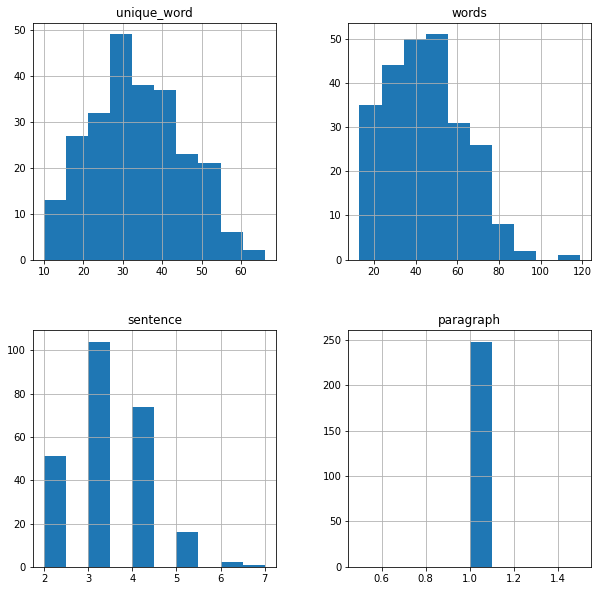

In [27]:
# df.to_csv('statistics_{}.csv'.format(model_id))
hist = df.hist(figsize=(10, 10), bins=10, column=['unique_word', 'words', 'sentence', 'paragraph'])

In [33]:
definition_df = build_def_df(1)
definition_df.head()

,id,definition,term_id,term,model_id,model_name,prompt_id,prompt,counter,cosine_distance,euclidean_distance,manhattan_distance,sum_distance
0,1,A passenger aircraft drone component is a part...,1,passenger aircraft,1,chatgpt,1,Provide the definition of passenger aircraft d...,1,0.042928,0.293013,6.496316,6.832258
1,2,A passenger drone component is a part of a dro...,2,passenger,1,chatgpt,2,Provide the definition of passenger drone comp...,1,0.046516,0.305010,6.670732,7.022258
2,3,An aircraft drone component is a physical part...,3,aircraft,1,chatgpt,3,Provide the definition of aircraft drone compo...,1,0.054960,0.331543,7.227223,7.613726
3,4,ActiveTrack is a feature of some drones that a...,4,ActiveTrack,1,chatgpt,4,Provide the definition of ActiveTrack drone st...,1,0.063491,0.356345,7.812126,8.231961
4,5,ActiveTrack is a feature of some drones that a...,4,ActiveTrack,1,chatgpt,4,Provide the definition of ActiveTrack drone st...,2,0.063491,0.356345,7.812126,8.231961


In [35]:
def_stat = definition_df[['cosine_distance', 'euclidean_distance', 'manhattan_distance', 'sum_distance']]
def_stat.head()

,cosine_distance,euclidean_distance,manhattan_distance,sum_distance
0,0.042928,0.293013,6.496316,6.832258
1,0.046516,0.305010,6.670732,7.022258
2,0.054960,0.331543,7.227223,7.613726
3,0.063491,0.356345,7.812126,8.231961
4,0.063491,0.356345,7.812126,8.231961


In [36]:
def_stat.describe()

,cosine_distance,euclidean_distance,manhattan_distance,sum_distance
count,252.000000,252.000000,252.000000,252.000000
mean,0.050805,0.316464,6.964975,7.332244
std,0.012902,0.038285,0.858402,0.909357
min,0.025904,0.227616,4.968898,5.222417
25%,0.042414,0.291251,6.391538,6.726112
50%,0.049009,0.313079,6.868279,7.226427
75%,0.057210,0.338260,7.469006,7.866665
max,0.127251,0.504483,11.095497,11.727231


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
db_path = '../database/drone_definitions.db'
conn = sqlite3.connect(db_path)
# conn = sqlite3.connect('your_database.db')

# Execute the query and fetch the results into a DataFrame
query = """
    SELECT model_name, 
           AVG(unique_word) AS mean_unique_word,
           AVG(word) AS mean_word,
           AVG(sentence) AS mean_sentence,
           AVG(paragraph) AS mean_paragraph
    FROM statistics, models
    WHERE models.id = statistics.model_id AND model_id IN (1, 2, 3, 7, 8)
    GROUP BY model_id
"""
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


In [6]:
df['model_name'] = df['model_name'].replace({'chatgpt': 'davinci-002', 'gptturbo': 'gpt3.5'})
df

,model_name,mean_unique_word,mean_word,mean_sentence,mean_paragraph
0,davinci-002,33.657258,45.153226,3.262097,1.000000
1,chatsonic,86.609890,131.901099,6.357143,1.593407
2,claude,153.778226,271.020161,18.766129,8.032258
3,gpt3.5,78.834677,110.798387,5.552419,1.625000
4,gpt4,77.955645,108.129032,5.419355,1.572581


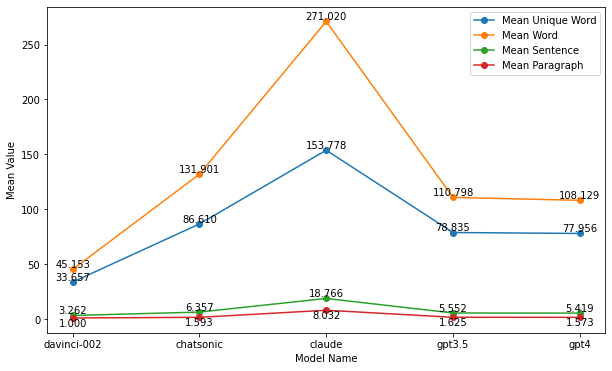

In [12]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(df['model_name'], df['mean_unique_word'], marker='o', label='Mean Unique Word')
plt.plot(df['model_name'], df['mean_word'], marker='o', label='Mean Word')
plt.plot(df['model_name'], df['mean_sentence'], marker='o', label='Mean Sentence')
plt.plot(df['model_name'], df['mean_paragraph'], marker='o', label='Mean Paragraph')

# Plot the line graph
x = df['model_name']
columns = ['mean_unique_word', 'mean_word', 'mean_sentence', 'mean_paragraph']
for col in columns:
    # plt.plot(x, df[col], marker='o')
    for i, j in zip(x, df[col]):
        if col == 'mean_paragraph':
            plt.text(i, j, f'{j:.3f}', ha='center', va='top')
        else:
            plt.text(i, j, f'{j:.3f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Mean Value')
# plt.title('Mean Statistics by Model ID')

# Add legend
plt.legend()
plt.savefig('../analysis/visualization/sum_statistics_all.pdf')
# Display the plot
plt.show()